In [ ]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_data = pd.read_csv('./test.csv')
train_data = pd.read_csv('./train.csv')

In [178]:
test_data.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,252000.0
1,Not Placed,M,62.0,Others,51.0,Others,Science,52.0,Others,No,68.44,Mkt&HR,62.77,NaN
2,Placed,M,63.0,Central,60.0,Central,Commerce,57.0,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,204000.0
3,Placed,M,72.0,Others,63.0,Others,Science,77.5,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,250000.0
4,Not Placed,F,70.5,Central,62.5,Others,Commerce,61.0,Comm&Mgmt,No,93.91,Mkt&Fin,69.03,NaN


In [179]:
train_data.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,F,87.0,Others,65.0,Others,Science,81.0,Comm&Mgmt,Yes,88.0,Mkt&Fin,72.78,260000.0
1,Placed,F,86.5,Others,64.2,Others,Science,67.4,Sci&Tech,No,59.0,Mkt&Fin,59.69,240000.0
2,Placed,F,75.2,Central,73.2,Central,Science,68.4,Comm&Mgmt,No,65.0,Mkt&HR,62.98,200000.0
3,Placed,M,68.0,Others,56.0,Others,Science,68.0,Sci&Tech,No,73.0,Mkt&HR,68.07,350000.0
4,Placed,M,84.0,Others,79.0,Others,Science,68.0,Sci&Tech,Yes,84.0,Mkt&Fin,66.69,300000.0


In [6]:
train_data.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            43
dtype: int64

In [7]:
test_data.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64

In [168]:
train_data[train_data.salary.isnull()].head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
11,Not Placed,F,50.0,Others,37.0,Others,Arts,52.0,Others,No,65.0,Mkt&HR,56.11,NaN
15,Not Placed,M,41.0,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.0,Mkt&Fin,53.39,NaN
20,Not Placed,M,51.0,Central,44.0,Central,Commerce,57.0,Comm&Mgmt,No,64.0,Mkt&Fin,51.45,NaN
25,Not Placed,F,67.0,Central,70.0,Central,Commerce,65.0,Others,No,88.0,Mkt&HR,71.96,NaN
28,Not Placed,M,66.0,Central,64.0,Central,Science,60.0,Comm&Mgmt,No,60.0,Mkt&HR,61.90,NaN


## Status

#### Nel set di dati sono presenti più studenti che hanno trovato collocazione

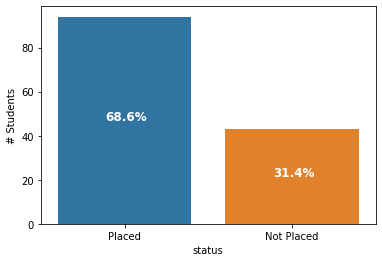

In [13]:
ax = sns.countplot(x = train_data.status)
plt.ylabel('# Students')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

In [17]:
train_data.status.value_counts()

Placed        94
Not Placed    43
Name: status, dtype: int64

## Gender

#### Circa il 65% sono studenti Maschi e la percentuale di studenti Maschi e Femmine che ha trovato collocazione è la stessa ed è poco meno del 70%

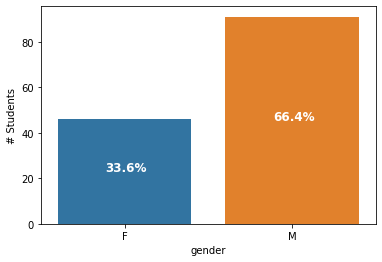

In [146]:
ax = sns.countplot(x = train_data.gender)
plt.ylabel('# Students')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

In [19]:
g = train_data.groupby('gender')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
gender status                      
F      Placed         32      69.6%
       Not Placed     14      30.4%
M      Placed         62      68.1%
       Not Placed     29      31.9%

## ssc_p - Punteggio scuola media

#### Gli studenti che hanno ottenuto un punteggio scuola media minore di 65 hanno una percentuale più alta di non trovare collocazione, cosa divesa succede se lo studente ha un punteggio scuola media superiore o uguale a 65, in questo caso più del 90% ha trovato collocazione

In [36]:
g = train_data[train_data.ssc_p < 65].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Not Placed,37,60.7%
Placed,24,39.3%


In [63]:
g = train_data[train_data.ssc_p >= 65].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,70,92.1%
Not Placed,6,7.9%


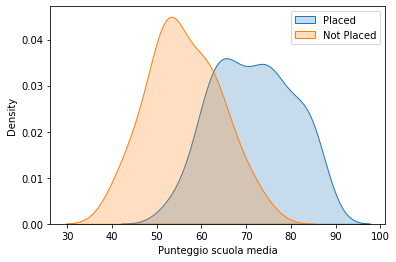

In [49]:
plt.xlabel('Punteggio scuola media')
sns.kdeplot(data=train_data.ssc_p[train_data.status == 'Placed'], shade=True)
sns.kdeplot(data=train_data.ssc_p[train_data.status == 'Not Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

## ssc_b - Board of Education per le medie

#### In questo caso le percentuali di chi ha trovato e di chi non ha trovato collocazione sono le stesse sia per Central e Others. Considerando anche il fatto che rappresentano commissione interna o esterna ai fini dell'addestramento è possibile eliminare la colonna.

In [66]:
g = train_data.groupby('ssc_b')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
ssc_b   status                      
Central Placed         45      67.2%
        Not Placed     22      32.8%
Others  Placed         49      70.0%
        Not Placed     21      30.0%

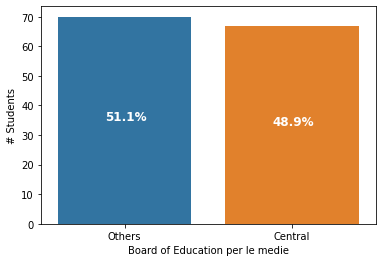

In [148]:
ax = sns.countplot(x = train_data.ssc_b)
plt.ylabel('# Students')
plt.xlabel('Board of Education per le medie')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## hsc_p - Punteggio di diploma

#### Come nel caso di punteggio scuola media, gli studenti che hanno ottenuto un punteggio di diploma minore di 60 hanno una percentuale più alta di non trovare collocazione, mentre se lo studente ha un punteggio di diploma superiore o uguale a 60 ha percentuale di collocazione superiore all'80%

In [77]:
g = train_data[train_data.hsc_p < 60].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Not Placed,24,77.4%
Placed,7,22.6%


In [78]:
g = train_data[train_data.hsc_p >= 60].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,87,82.1%
Not Placed,19,17.9%


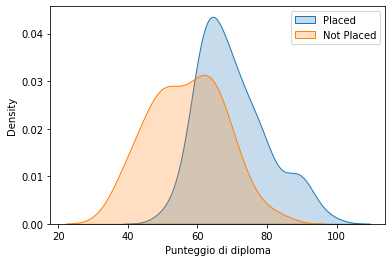

In [74]:
plt.xlabel('Punteggio di diploma')
sns.kdeplot(data=train_data.hsc_p[train_data.status == 'Placed'], shade=True)
sns.kdeplot(data=train_data.hsc_p[train_data.status == 'Not Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

## hsc_b - Board of Education per il diploma

#### Come nel caso di Board of Education per le medie, essendo le percentuali uguali è possibile rimuovere anche questa colonna per l'addestramento

In [79]:
g = train_data.groupby('hsc_b')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
hsc_b   status                      
Central Placed         34      68.0%
        Not Placed     16      32.0%
Others  Placed         60      69.0%
        Not Placed     27      31.0%

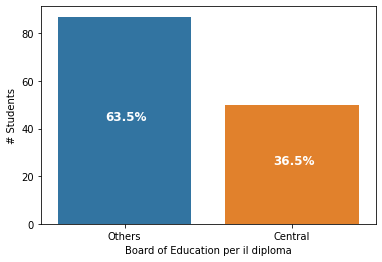

In [150]:
ax = sns.countplot(x = train_data.hsc_b)
plt.ylabel('# Students')
plt.xlabel('Board of Education per il diploma')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## hsc_s - Tipologia di liceo

#### Gli studenti che hanno commercio e scienza come tipologia di liceo hanno una percentuale più alta di collocazione, rispetto al settore arte che ha le percentuali quasi uguali. Questo potrebbe dipendere anche dal fatto che nel set di dati ci sono pochi studenti che hanno arte come tipologia di liceo.

In [82]:
g = train_data.groupby('hsc_s')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
hsc_s    status                      
Arts     Placed          6      54.5%
         Not Placed      5      45.5%
Commerce Placed         49      69.0%
         Not Placed     22      31.0%
Science  Placed         39      70.9%
         Not Placed     16      29.1%

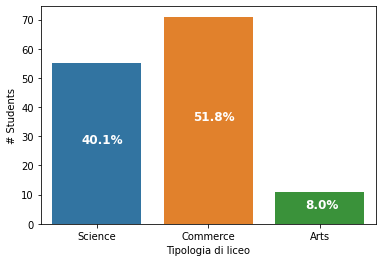

In [164]:
ax = sns.countplot(x = train_data.hsc_s)
plt.ylabel('# Students')
plt.xlabel('Tipologia di liceo')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## degree_p - Punteggio di laurea

#### Gli studenti che hanno ottenuto un punteggio di laurea superiore o uguale a 65 hanno una percentuale superiore all'85% di trovare collocazione. Nel caso di punteggio minore di 65 la percentuale di studenti che non ha trovato collocazione è di poco supeiore a chi ha trovato collocazione. Inoltre, chi ha ottenuto un punteggio abbastanza elevato sia per il diploma che per la laurea ha una percentuale superiore al 90% di trovare collocazione. Al contrario, nel caso di punteggi bassi si ha che più dell'80% di studenti non ha trovato collocazione.

In [174]:
g = train_data[train_data.degree_p >= 65].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,70,86.4%
Not Placed,11,13.6%


In [175]:
g = train_data[train_data.degree_p < 65].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Not Placed,32,57.1%
Placed,24,42.9%


In [139]:
g = train_data[(train_data.hsc_p >= 60) & (train_data.degree_p >= 65)].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,66,93.0%
Not Placed,5,7.0%


In [176]:
g = train_data[(train_data.hsc_p < 60) & (train_data.degree_p < 65)].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Not Placed,18,85.7%
Placed,3,14.3%


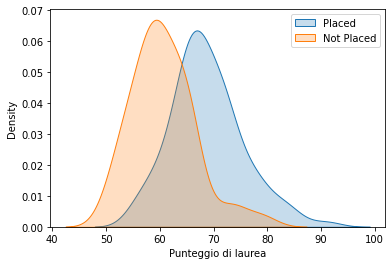

In [83]:
plt.xlabel('Punteggio di laurea')
sns.kdeplot(data=train_data.degree_p[train_data.status == 'Placed'], shade=True)
sns.kdeplot(data=train_data.degree_p[train_data.status == 'Not Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

## degree_t - Settore disciplinare della laurea

#### Gli studenti che hanno commercio e scienza come settore disciplinare di laurea hanno una percentuale più alta di collocazione, rispetto al settore arte che ha le percentuali quasi uguali. Questo potrebbe dipendere anche dal fatto che nel set di dati ci sono pochi studenti che hanno arte come settore disciplinare della laurea.

In [89]:
g = train_data.groupby('hsc_s')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
hsc_s    status                      
Arts     Placed          6      54.5%
         Not Placed      5      45.5%
Commerce Placed         49      69.0%
         Not Placed     22      31.0%
Science  Placed         39      70.9%
         Not Placed     16      29.1%

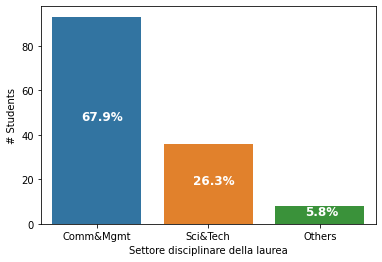

In [163]:
ax = sns.countplot(x = train_data.degree_t)
plt.ylabel('# Students')
plt.xlabel('Settore disciplinare della laurea')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## workex - Esperienza lavorativa

#### Anche senza esperienza lavorativa più del 60% degli studenti ha trovato collocazione e la percentuale sale all'80% per chi ha anche esperienza lavorativa. Se si prende in considerazione anche il punteggio di laurea è possibile osservare che circa il 68% non ha trovato collocazione con un punteggio minore di 65 e non avendo nessuna esperienza lavorativa. Al contrario, anche avendo un punteggio di laurea inferiore a 65 ma avendo esperienza lavorativa più del 70% degli studenti ha trovato collocazione. Invece, nel caso di punteggio di laurea superiore o uguale a 65 le percentuali di trovare collocazione sono superiori all'80% sia per chi non ha esperienza e sia per chi ha esperienza lavorativa

In [97]:
g = train_data.groupby('workex')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
workex status                      
No     Placed         58      61.7%
       Not Placed     36      38.3%
Yes    Placed         36      83.7%
       Not Placed      7      16.3%

#### Esperienza lavorativa con punteggio laurea minore di 65

In [118]:
g = train_data[train_data.degree_p < 65].groupby('workex')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
workex status                      
No     Not Placed     28      68.3%
       Placed         13      31.7%
Yes    Placed         11      73.3%
       Not Placed      4      26.7%

#### Esperienza lavorativa con punteggio laurea maggiore uguale a 65

In [119]:
g = train_data[train_data.degree_p >= 65].groupby('workex')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
workex status                      
No     Placed         45      84.9%
       Not Placed      8      15.1%
Yes    Placed         25      89.3%
       Not Placed      3      10.7%

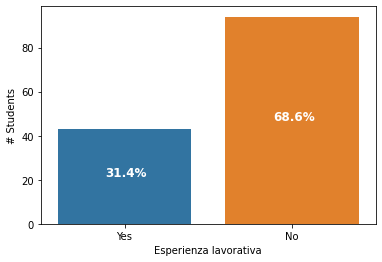

In [154]:
ax = sns.countplot(x = train_data.workex)
plt.ylabel('# Students')
plt.xlabel('Esperienza lavorativa')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## etest_p - Punteggio test di collocabilità

#### Nel caso del punteggio test di collocabilità la percentuale di studenti, con un punteggio superiore a 70, che ha trovato collocazione  è superiore  al 75%. La percentuale scende di poco (si ha circa il 60%) per gli studenti con un punteggio inferiore a 70. Prendendo in considerazione l'esperienza lavorativa, il punteggio test di collocabilità, punteggio di laurea e punteggio di diploma si può osservare che con dei punteggi abbastanza elevati gli studenti hanno trovato collocazione anche senza aver esperienza lavorativa, al contrario, con punteggi bassi la percentuale di studenti che non ha trovato collocazione, senza avere esperienza lavorativa, è pari al 100%. 

In [103]:
g = train_data[train_data.etest_p < 70].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,40,59.7%
Not Placed,27,40.3%


In [104]:
g = train_data[train_data.etest_p >= 70].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,54,77.1%
Not Placed,16,22.9%


In [135]:
g = train_data[(train_data.etest_p >= 70) & (train_data.hsc_p >= 60) & (train_data.degree_p >= 65)].groupby('workex')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
workex status                      
No     Placed         24      92.3%
       Not Placed      2       7.7%
Yes    Placed         16      94.1%
       Not Placed      1       5.9%

In [134]:
g = train_data[(train_data.etest_p < 70) & (train_data.hsc_p < 60) & (train_data.degree_p < 65)].groupby('workex')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
workex status                      
No     Not Placed     10     100.0%
Yes    Not Placed      2      66.7%
       Placed          1      33.3%

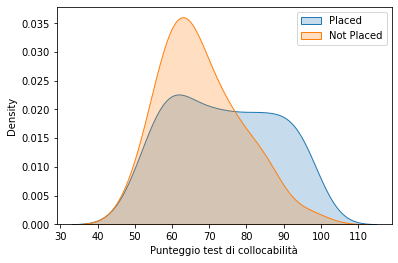

In [101]:
plt.xlabel('Punteggio test di collocabilità')
sns.kdeplot(data=train_data.etest_p[train_data.status == 'Placed'], shade=True)
sns.kdeplot(data=train_data.etest_p[train_data.status == 'Not Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

## specialisation - Specializzazione post laurea (MBA)

#### Sono presenti due specializzazioni e nel caso di Mkt&Fin solo pochi studenti (meno del 20%) non ha trovato collocazione, invece, nel caso di Mkt&HR la percentuale è di poco superiore al 50% per gli studenti che hanno trovato collocazione.

In [142]:
g = train_data.groupby('specialisation')['status']
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

Count Percentage
specialisation status                      
Mkt&Fin        Placed         61      80.3%
               Not Placed     15      19.7%
Mkt&HR         Placed         33      54.1%
               Not Placed     28      45.9%

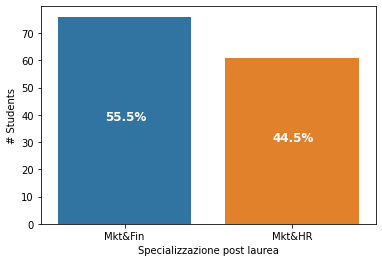

In [162]:
ax = sns.countplot(x = train_data.specialisation)
plt.ylabel('# Students')
plt.xlabel('Specializzazione post laurea')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 2.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

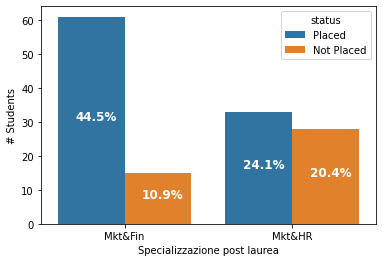

In [161]:
ax = sns.countplot(x = train_data.specialisation, hue = train_data.status)
plt.ylabel('# Students')
plt.xlabel('Specializzazione post laurea')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(train_data))
    x = p.get_x() + p.get_width() / 3.8
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(percentage), (x, y), color = 'white', fontsize = 12, weight = 'bold')
plt.show()

## mba_p - Punteggio MBA

#### La percentuale di studenti che ha trovato collocazione considerando un punteggio MBA superiore o uguale a 60 è pari a circa il 15% in più della percenutale di studenti che ha un punteggio MBA inferiore a 60 (in questo caso il 60%)

In [166]:
g = train_data[train_data.mba_p < 60].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,33,60.0%
Not Placed,22,40.0%


In [167]:
g = train_data[train_data.mba_p >= 60].status
pd.concat([g.value_counts(), g.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'], axis = 1, keys = ('Count', 'Percentage'))

,Count,Percentage
Placed,61,74.4%
Not Placed,21,25.6%


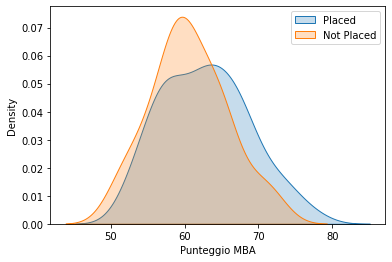

In [165]:
plt.xlabel('Punteggio MBA')
sns.kdeplot(data=train_data.mba_p[train_data.status == 'Placed'], shade=True)
sns.kdeplot(data=train_data.mba_p[train_data.status == 'Not Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

## salary - Stipendio offerto dalla compagnia ai candidati

#### La colonna del set di dati che specifica il salario ha componenti NaN, ma visto che il salario non è importate ai fini dell'addestramento per determinare se uno studente ha trovato o meno collocazione, può essere eliminata.

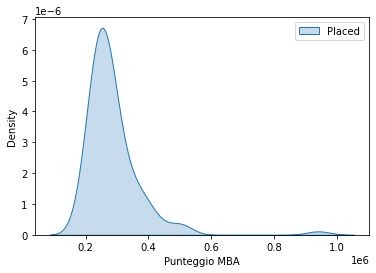

In [170]:
plt.xlabel('Punteggio MBA')
sns.kdeplot(data=train_data.salary[train_data.status == 'Placed'], shade=True)
plt.legend(['Placed', 'Not Placed'])
plt.show()

In [171]:
train_data.salary[train_data.status == 'Placed'].mean()

287425.5319148936

In [186]:
data_train = train_data.drop(['ssc_b', 'hsc_b', 'salary'], axis=1)
data_test = test_data.drop(['ssc_b', 'hsc_b', 'salary'], axis=1)

In [187]:
data_train.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,F,87.0,65.0,Science,81.0,Comm&Mgmt,Yes,88.0,Mkt&Fin,72.78
1,Placed,F,86.5,64.2,Science,67.4,Sci&Tech,No,59.0,Mkt&Fin,59.69
2,Placed,F,75.2,73.2,Science,68.4,Comm&Mgmt,No,65.0,Mkt&HR,62.98
3,Placed,M,68.0,56.0,Science,68.0,Sci&Tech,No,73.0,Mkt&HR,68.07
4,Placed,M,84.0,79.0,Science,68.0,Sci&Tech,Yes,84.0,Mkt&Fin,66.69


In [191]:
from sklearn.preprocessing import LabelEncoder

label_train_data = data_train.copy()
label_test_data = data_test.copy()

label_encoder = LabelEncoder()
label_train_data['status'] = label_encoder.fit_transform(data_train['status'])
label_train_data['gender'] = label_encoder.fit_transform(data_train['gender'])
label_train_data['hsc_s'] = label_encoder.fit_transform(data_train['hsc_s'])
label_train_data['degree_t'] = label_encoder.fit_transform(data_train['degree_t'])
label_train_data['workex'] = label_encoder.fit_transform(data_train['workex'])
label_train_data['specialisation'] = label_encoder.fit_transform(data_train['specialisation'])

label_test_data['status'] = label_encoder.fit_transform(data_test['status'])
label_test_data['gender'] = label_encoder.fit_transform(data_test['gender'])
label_test_data['hsc_s'] = label_encoder.fit_transform(data_test['hsc_s'])
label_test_data['degree_t'] = label_encoder.fit_transform(data_test['degree_t'])
label_test_data['workex'] = label_encoder.fit_transform(data_test['workex'])
label_test_data['specialisation'] = label_encoder.fit_transform(data_test['specialisation'])

In [194]:
data_train.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,F,87.0,65.0,Science,81.0,Comm&Mgmt,Yes,88.0,Mkt&Fin,72.78
1,Placed,F,86.5,64.2,Science,67.4,Sci&Tech,No,59.0,Mkt&Fin,59.69
2,Placed,F,75.2,73.2,Science,68.4,Comm&Mgmt,No,65.0,Mkt&HR,62.98
3,Placed,M,68.0,56.0,Science,68.0,Sci&Tech,No,73.0,Mkt&HR,68.07
4,Placed,M,84.0,79.0,Science,68.0,Sci&Tech,Yes,84.0,Mkt&Fin,66.69


In [192]:
label_train_data.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,0,87.0,65.0,2,81.0,0,1,88.0,0,72.78
1,1,0,86.5,64.2,2,67.4,2,0,59.0,0,59.69
2,1,0,75.2,73.2,2,68.4,0,0,65.0,1,62.98
3,1,1,68.0,56.0,2,68.0,2,0,73.0,1,68.07
4,1,1,84.0,79.0,2,68.0,2,1,84.0,0,66.69


In [195]:
data_test.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,M,82.0,64.0,Science,66.0,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
1,Not Placed,M,62.0,51.0,Science,52.0,Others,No,68.44,Mkt&HR,62.77
2,Placed,M,63.0,60.0,Commerce,57.0,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55
3,Placed,M,72.0,63.0,Science,77.5,Sci&Tech,Yes,78.00,Mkt&Fin,54.48
4,Not Placed,F,70.5,62.5,Commerce,61.0,Comm&Mgmt,No,93.91,Mkt&Fin,69.03


In [193]:
label_test_data.head()

,status,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,82.0,64.0,1,66.0,2,1,67.00,0,62.14
1,0,1,62.0,51.0,1,52.0,1,0,68.44,1,62.77
2,1,1,63.0,60.0,0,57.0,0,1,78.00,0,54.55
3,1,1,72.0,63.0,1,77.5,2,1,78.00,0,54.48
4,0,0,70.5,62.5,0,61.0,0,0,93.91,0,69.03


In [269]:
train_data.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,F,87.0,Others,65.0,Others,Science,81.0,Comm&Mgmt,Yes,88.0,Mkt&Fin,72.78,260000.0
1,Placed,F,86.5,Others,64.2,Others,Science,67.4,Sci&Tech,No,59.0,Mkt&Fin,59.69,240000.0
2,Placed,F,75.2,Central,73.2,Central,Science,68.4,Comm&Mgmt,No,65.0,Mkt&HR,62.98,200000.0
3,Placed,M,68.0,Others,56.0,Others,Science,68.0,Sci&Tech,No,73.0,Mkt&HR,68.07,350000.0
4,Placed,M,84.0,Others,79.0,Others,Science,68.0,Sci&Tech,Yes,84.0,Mkt&Fin,66.69,300000.0


In [308]:
train_X = label_train_data.drop(['status'], axis=1)
train_y = label_train_data.status

In [309]:
train_X.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,87.0,65.0,2,81.0,0,1,88.0,0,72.78
1,0,86.5,64.2,2,67.4,2,0,59.0,0,59.69
2,0,75.2,73.2,2,68.4,0,0,65.0,1,62.98
3,1,68.0,56.0,2,68.0,2,0,73.0,1,68.07
4,1,84.0,79.0,2,68.0,2,1,84.0,0,66.69


In [310]:
train_y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [311]:
test_X = label_test_data.drop(['status'], axis=1)
test_y = label_test_data.status

In [312]:
test_X.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,82.0,64.0,1,66.0,2,1,67.00,0,62.14
1,1,62.0,51.0,1,52.0,1,0,68.44,1,62.77
2,1,63.0,60.0,0,57.0,0,1,78.00,0,54.55
3,1,72.0,63.0,1,77.5,2,1,78.00,0,54.48
4,0,70.5,62.5,0,61.0,0,0,93.91,0,69.03


In [313]:
test_y.head()

0    1
1    0
2    1
3    1
4    0
Name: status, dtype: int64

## Train

#### LogisticRegression, è possibile osservare che si ottiene circa l'85% di accuracy e dal grafico è possibile osservare che la probabilità di trovare collocazione diminuisce con la specializzazione, mentre l'esperienza lavorativa è la più alta che porta a trovare collocazione

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [331]:
prediction_test = model.predict(test_X)
print("Accuracy: " + str(accuracy_score(test_y, prediction_test)))

Accuracy: 0.8571428571428571


AxesSubplot(0.125,0.125;0.775x0.755)


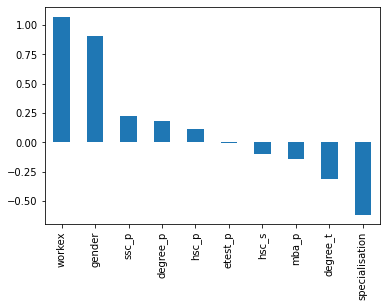

In [332]:
weights = pd.Series(model.coef_[0],
                 index=test_X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

#### RandomForest, accuracy superiore di poco a quella della LogisticRegression, pari all'88% e in questo caso in testa alle variabili predittive più importanti per prevedere la collocazione troviamo i punteggi ottenuti dagli studenti, il più importante è quello di scuola media, seguito dal punteggio di laurea.

In [333]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(train_X, train_y)

RandomForestClassifier()

In [334]:
pred_y = model_rf.predict(test_X)
print("Accuracy: " + str(accuracy_score(test_y, pred_y)))

Accuracy: 0.8857142857142857


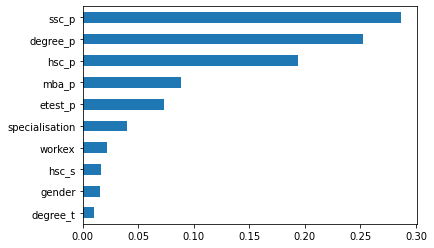

In [319]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=test_X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

#### Scalando tutte le variabili per la LogisticRegression si ha la stessa accuracy, ma cambia il grafico dove si può osservare che le variabili predittive più importanti diventato i punteggi come visto nel grafico della RandomForest e la variabile gender che prima era quasi in testa al grafico adesso è diventata meno importante, come si può osservare anche dal grafico della RandomForest. L'accuracy nel caso della RandomForest scende al 77%.

In [335]:
from sklearn.preprocessing import MinMaxScaler
train_X_n = train_X.copy()
features = train_X_n.columns.values
scaler = MinMaxScaler()
scaler.fit(train_X_n)
train_X_n = pd.DataFrame(scaler.transform(train_X_n))
train_X_n.columns = features


test_X_n = test_X.copy()
features = test_X_n.columns.values
scaler = MinMaxScaler()
scaler.fit(test_X_n)
test_X_n = pd.DataFrame(scaler.transform(test_X_n))
test_X_n.columns = features

In [336]:
train_X_n.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0.0,1.000000,0.461285,1.0,0.751244,0.0,1.0,0.791667,0.0,0.808471
1,0.0,0.989156,0.448105,1.0,0.412935,1.0,0.0,0.187500,0.0,0.317841
2,0.0,0.744090,0.596376,1.0,0.437811,0.0,0.0,0.312500,1.0,0.441154
3,1.0,0.587942,0.313015,1.0,0.427861,1.0,0.0,0.479167,1.0,0.631934
4,1.0,0.934938,0.691928,1.0,0.427861,1.0,1.0,0.708333,0.0,0.580210


In [337]:
test_X_n.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.886364,0.34,1.0,0.516129,1.0,1.0,0.311491,0.0,0.444308
1,1.0,0.431818,0.08,1.0,0.064516,0.5,0.0,0.345679,1.0,0.470106
2,1.0,0.454545,0.26,0.0,0.225806,0.0,1.0,0.572650,0.0,0.133497
3,1.0,0.659091,0.32,1.0,0.887097,1.0,1.0,0.572650,0.0,0.130631
4,0.0,0.625000,0.31,0.0,0.354839,0.0,0.0,0.950380,0.0,0.726454


In [338]:
model_n = LogisticRegression()
model_n.fit(train_X_n, train_y)

LogisticRegression()

In [339]:
prediction_test_n = model_n.predict(test_X_n)
print("Accuracy: " + str(accuracy_score(test_y, prediction_test_n)))

Accuracy: 0.8571428571428571


AxesSubplot(0.125,0.125;0.775x0.755)


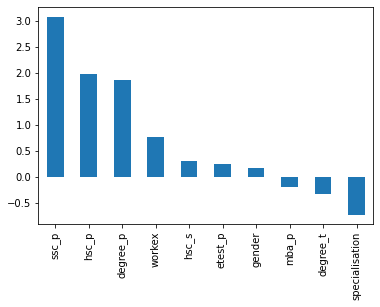

In [340]:
weights = pd.Series(model_n.coef_[0],
                 index=test_X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [341]:
model_rf_n = RandomForestClassifier(n_estimators=100)
model_rf_n.fit(train_X_n, train_y)

RandomForestClassifier()

In [342]:
pred_y_n = model_rf_n.predict(test_X_n)
print("Accuracy: " + str(accuracy_score(test_y, pred_y_n)))

Accuracy: 0.7714285714285715


<AxesSubplot:>

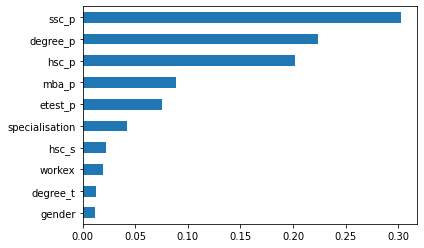

In [343]:
importances = model_rf_n.feature_importances_
weights = pd.Series(importances,
                 index=test_X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')